In [1]:
import pandas as pd

# Load CSV into dataframe
df = pd.read_csv ('tweets.csv')

In [2]:
df.head()

,tweet_text,created_at,place,context_annotations,city
0,kemana kamu nak alirkan air dari kota kemuning...,2022-01-01 14:33:48+00:00,NaN,"[{'domain': {'id': '66', 'name': 'Interests an...",[]
1,#DaruratBanjir\r\n#Johor https://t.co/Nxy7oMWwkr,2022-01-01 14:33:26+00:00,NaN,"[{'domain': {'id': '66', 'name': 'Interests an...",[]
2,"menteri fed &amp; state &amp; exco ,\r\nsement...",2022-01-01 14:31:39+00:00,NaN,"[{'domain': {'id': '66', 'name': 'Interests an...",[]
3,#DaruratBanjir #BenderaPutih #RakyatJagaRakyat...,2022-01-01 14:22:17+00:00,NaN,"[{'domain': {'id': '66', 'name': 'Interests an...",[]
4,Bantuan RM2500 untuk membeli barang2 keperluan...,2022-01-01 14:18:25+00:00,NaN,"[{'domain': {'id': '66', 'name': 'Interests an...",[]


## Most mentioned word in Word Cloud

In [3]:
%%time
# Reference : https://malaya.readthedocs.io/en/latest/Api.html#module-malaya.preprocessing
import malaya

tokenizer = malaya.preprocessing.Tokenizer(hashtags= False)
extracbas = malaya.stem.deep_model()
tweetlist = []

for tweet in df['tweet_text']:
    tkn = tokenizer.tokenize(tweet)
    for t in tkn:
        tkn = malaya.preprocessing.unpack_english_contractions(t)
        basetkn = extracbas.stem(tkn,beam_search= False)
    tweetlist.append(basetkn)

tweetlist


Wall time: 1h 16s


['tamansrimuda',
 'https://t.co/Nxy7oMWwkr',
 'daruratbanjir',
 'https://t.co/vPNrLkZCvQ',
 'https://t.co/1fMB2uzJ0j',
 'https://t.co/0bdogOLKCQ',
 'https://t.co/WowLSVGmZ4',
 'https://t.co/xdblxkPsae',
 'https://t.co/KlEPi4ZC2H',
 'https://t.co/ud0KI36O39',
 'https://t.co/ouHEHoeel7',
 'https://t.co/fAkIi2pfEN',
 'https://t.co/T4vNljL625',
 'https://t.co/tjuX5s2Wzm',
 'https://t.co/egakna7kPk',
 'daruratbanjir',
 'kerajaangagalli',
 'https://t.co/UagNov3yUP',
 'daruratbanjir',
 'https://t.co/s4GrBT4K5w',
 'https://t.co/LHYTk7HlIB',
 'https://t.co/mIAXho2Egn',
 'https://t.co/wxj79FXpYo',
 'https://t.co/wvgenzHQB8',
 'https://t.co/YgPe1wYz99',
 'https://t.co/HeVqvcTmAG',
 'https://t.co/otJZ5tI44L',
 'https://t.co/4c0fqXyTMV',
 'https://t.co/t1Wg4XPtlj',
 'https://t.co/jtU670efVf',
 'https://t.co/NRtXFsvJsp',
 'https://t.co/H0KE0nO3aM',
 'https://t.co/HXAdHzjB2T',
 'https://t.co/Jj5cTSLf5v',
 'https://t.co/ZQ6YN6T513',
 'https://t.co/OcrOerJYxM',
 'https://t.co/3NCOOMngdV',
 'https://t.c

In [51]:
# Set Custom Stopwords
from nltk.corpus import stopwords

new_words = ["co","http","di","yang","dan","amp","ini", "untuk", "n", "ni", "ada", "kami", "yg", "ke", "1", "2", "nak", "daruratbanjir", "3", "lagi", "tak", "kita"]
stop_words = set(stopwords.words('english'))
stop_words = stop_words.union(set(new_words))

In [55]:
#Define function to lemmatise data and add stop word

import nltk
def cleanData(raw_text):    
    from nltk.corpus import stopwords
    from nltk.stem.porter import PorterStemmer
    from nltk.tokenize import RegexpTokenizer
    from nltk.stem.wordnet import WordNetLemmatizer
    
    tokenizer = nltk.RegexpTokenizer(r"\w+")
    words = tokenizer.tokenize(raw_text)

    wordsFiltered=[]
    for word in words:
        if word.lower() not in stop_words:
            wordsFiltered.append(word)
    
    lem = WordNetLemmatizer()
    wordsLemmatized=[]
    #Lemmatisation
    for word in wordsFiltered:
        wordsLemmatized.append(lem.lemmatize(word))
    
#   Convert to lowercase
    str=''
    for w in wordsLemmatized:
        str = str+' '+w.lower()
    return str

In [56]:
# Observe stopwords and add to new_words
import pandas

df_word = df.apply(lambda row:cleanData(row['tweet_text']), axis = 1) # apply function to each tweet_t
freq = pandas.Series(''.join(df_word).split()).value_counts()[0:40]
print(freq)

http                4815
banjir              1679
bantuan              944
malaysia             894
rakyatjagarakyat     714
mangsa               583
flood                544
benderaputih         511
banjir2021           486
misi                 345
pahang               336
rt                   335
terima               333
sumbangan            309
semua                309
boleh                306
dari                 284
help                 279
rakyat               277
contact              274
team                 273
kepada               267
perlu                263
bantu                255
rumah                249
bagi                 248
kasih                244
mereka               241
kitajagakita         220
keluargamalaysia     219
orang                213
sukarelawan          213
cuci                 213
membantu             212
dengan               210
selangor             210
update               208
area                 205
muda                 201
air                  193


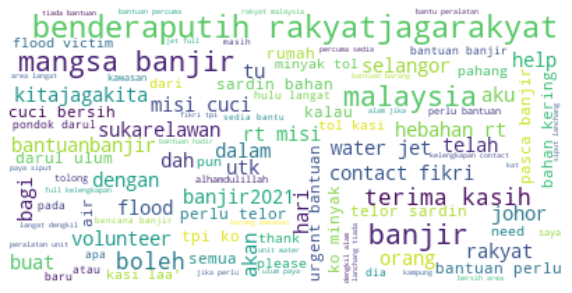

In [68]:
# Create Wordcloud and Save

import os
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

#used to convert data element into list
abstract = df_word.values.tolist() 

# Create wordcloud
wordcloud = WordCloud(background_color='white', stopwords=stop_words, max_words=100,max_font_size=50, random_state=42).generate(str(abstract))

# Display the generated image:
plt.figure(figsize=(10,10)) #inches
plt.axis("off")
plt.imshow(wordcloud, interpolation='bilinear')

plt.show()

# Save wordcloud to django static folder
path = os.getcwd() + r"\django-volt-dashboard\apps\static\assets\wc-word.png"
wordcloud.to_file(path)

## Most mentioned city in Word Cloud

In [4]:
# Remove empty bracket city
df_city = df[df.city != "[]"]

# Remove empty value city
df_city = df_city.dropna(subset=['city'])

df_city

,tweet_text,created_at,place,context_annotations,city
4370,"OH SELANGORKU! URUS COVID-19 PUN GAGAL, KALI N...",2022-01-06 03:32:02+00:00,NaN,"[{'domain': {'id': '123', 'name': 'Ongoing New...",['Putrajaya']
4377,Pengumuman Pengiriman Malaysia\r\n\r\nSehubung...,2022-01-06 03:21:57+00:00,NaN,"[{'domain': {'id': '65', 'name': 'Interests an...","['Segamat', 'Tampin']"
4383,YAYASAN AMAN BERHAD MILIK WAN AZIZAH TAK NAK B...,2022-01-06 03:07:11+00:00,NaN,"[{'domain': {'id': '65', 'name': 'Interests an...",['Putrajaya']
4392,"@null 120 ekor lembu hilang, jadi 'mangsa korb...",2022-01-06 03:00:23+00:00,NaN,"[{'domain': {'id': '65', 'name': 'Interests an...",['Segamat']
4397,"OH SELANGORKU! URUS COVID-19 PUN GAGAL, KALI N...",2022-01-06 02:49:58+00:00,NaN,"[{'domain': {'id': '123', 'name': 'Ongoing New...",['Putrajaya']
...,...,...,...,...,...
5490,"Di Johor, Khidmat Malaysia telah membuka 3 bua...",2022-01-04 00:55:01+00:00,NaN,"[{'domain': {'id': '123', 'name': 'Ongoing New...","['Segamat', 'Labis']"
5491,"Alhamdulillah, sebelum pulang ke Putrajaya, sa...",2022-01-04 00:54:59+00:00,NaN,"[{'domain': {'id': '123', 'name': 'Ongoing New...",['Putrajaya']
5507,"@null Kluang flood victims accept fate, thankf...",2022-01-04 00:20:24+00:00,NaN,"[{'domain': {'id': '123', 'name': 'Ongoing New...",['Kluang']
5525,KERAJAAN SEDIAKAN BANTUAN PEMBAIKAN &amp; PEMB...,2022-01-03 23:45:00+00:00,NaN,"[{'domain': {'id': '123', 'name': 'Ongoing New...",['Putrajaya']


In [5]:
# Cleaning city data from "['Putrajaya']" become "Putrajaya" & Add to an empty wc_city list

import re

wc_city_list = []
characters_to_remove = "\[\]\'"
pattern = "[" + characters_to_remove + "]"

for city in df_city['city']:
    wc_city_list.extend(re.sub(pattern, "", city).split(','))

print(wc_city_list)

['Putrajaya', 'Segamat', ' Tampin', 'Putrajaya', 'Segamat', 'Putrajaya', 'Muar', 'Kuala Lumpur', 'Segamat', 'Putrajaya', 'Putrajaya', 'Putrajaya', 'Yong Peng', 'Klang', 'Klang', 'Muar', 'Muar', 'Shah Alam', 'Putrajaya', 'Segamat', 'Klang', 'Kuantan', 'Segamat', 'Segamat', 'Klang', 'Sepang', 'Klang', 'Petaling Jaya', 'Raub', 'Raub', 'Raub', 'Kuala Kedah', 'Segamat', 'Putrajaya', 'Putrajaya', 'Klang', 'Shah Alam', 'Segamat', 'Shah Alam', ' Kuantan', 'Shah Alam', 'Petaling Jaya', ' Sepang', ' Kuala Selangor', 'Putrajaya', 'Putrajaya', 'Kuala Lumpur', 'Putrajaya', 'Segamat', 'Segamat', 'Segamat', 'Kluang', 'Putrajaya', 'Seremban', 'Putrajaya', 'Yong Peng', 'Putrajaya', 'Kuala Lumpur', 'Muar', 'Segamat', 'Pekan', 'Raub', ' Pekan', ' Kuala Lipis', 'Batu Berendam', 'Segamat', 'Paka', 'Banting', ' Mersing', 'Kuala Lipis', 'Shah Alam', 'Kuala Lumpur', ' Putrajaya', 'Klang', 'Kuantan', ' Raub', ' Jerantut', 'Segamat', 'Johor Bahru', ' Kluang', 'Putrajaya', 'Kuala Lipis', 'Johor Bahru', 'Segamat'

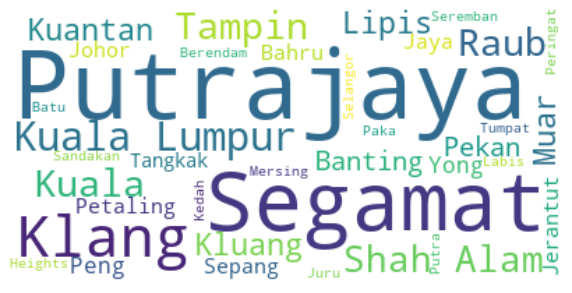

In [69]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wc_city = (" ").join(wc_city_list)
wordcloud = WordCloud(background_color="white", repeat=False).generate(wc_city)

# Display the generated image:
plt.figure(figsize=(10,10)) #inches
plt.axis("off")
plt.imshow(wordcloud, interpolation='bilinear')

plt.show()

# Save wordcloud to django static folder
path = os.getcwd() + r"\django-volt-dashboard\apps\static\assets\wc-location.png"
wordcloud.to_file(path)

## Count of flood-related hashtag against time line graph

In [8]:
# Split timestamp into date and timestamp
timestamp = df["created_at"].str.split(" ", n = 1, expand = True)
df["date"] = pd.to_datetime(timestamp[0])
df["time"] = timestamp[1]

In [9]:
# Group the tweets by date into new dataframe
df_count = df.groupby(df.date.dt.floor('1D')).count()
df_count

,tweet_text,created_at,place,context_annotations,city,date,time
date,,,,,,,
2021-12-25,308,308,21,308,0,308,308
2021-12-26,1264,1264,83,1264,0,1264,1264
2021-12-27,997,997,57,997,0,997,997
2021-12-28,631,631,13,631,0,631,631
2021-12-29,419,419,21,419,0,419,419
2021-12-30,322,322,14,322,0,322,322
2021-12-31,238,238,9,238,0,238,238
2022-01-01,187,187,6,187,0,187,187
2022-01-03,49,49,1,49,49,49,49


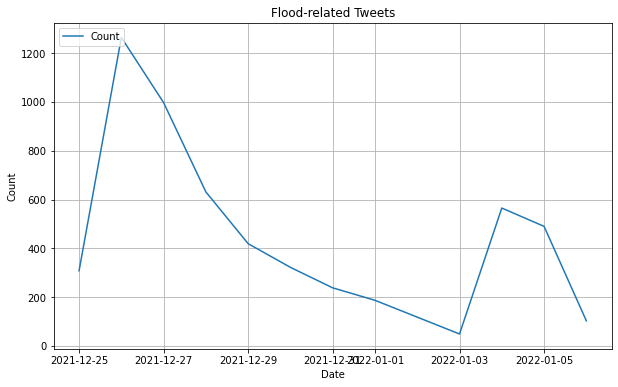

In [257]:
# Convention for import of the pyplot interface
import matplotlib.pyplot as plt

# Set-up to have matplotlib use its support for notebook inline plots
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 6))

# Specify how our lines should look
ax.plot(df_count.tweet_text, color='tab:blue', label='Count')

# Same as above
ax.set_xlabel('Date')
ax.set_ylabel('Count')
ax.set_title('Flood-related Tweets')
ax.grid(True)
ax.legend(loc='upper left');


# Save line graph to django static folder
path = os.getcwd() + r"\django-volt-dashboard\apps\static\assets\flood-trend.png"
plt.savefig(path)

## Most mentioned party in tweets

In [159]:
# Declare Malaysia Party, as of Jan 2022

df_party = pd.DataFrame([
    ['PH', 'DAP'],['PH', 'PKR'],['PH', 'AMANAH'],
    ['PN', 'BERSATU'],['PN', 'PAS'],['PN', 'GERAKAN'],
    ['BN', 'UMNO'],['BN', 'MCA'],['BN', 'MIS']
], columns=['Party','Member'])

df_party

,Party,Member
0,PH,DAP
1,PH,PKR
2,PH,AMANAH
3,PN,BERSATU
4,PN,PAS
5,PN,GERAKAN
6,BN,UMNO
7,BN,MCA
8,BN,MIS


In [160]:
# Count how many times those party were mentioned

# Declare empty list
count = []

for member in df_party['Member']:
    
    # Create a regex for the party to search for uppercase and lowercase and must have space before and after
    # For eg, DAP -> "\sDAP|dap\s"
    reg = "\s" + member + "|" + member.lower() + "\s"
    s = df['tweet_text'].str.count(reg).sum()
    count.append(s)
    
df_party['Count'] = count
df_party

,Party,Member,Count
0,PH,DAP,28
1,PH,PKR,2
2,PH,AMANAH,11
3,PN,BERSATU,3
4,PN,PAS,95
5,PN,GERAKAN,13
6,BN,UMNO,15
7,BN,MCA,21
8,BN,MIS,7


In [ ]:
# Following nested chart are reference through this site
# Ref 1 - https://stackoverflow.com/questions/67210640/how-can-i-draw-a-nested-pie-graph-in-matplotlib-in-python
# Ref 2 - https://matplotlib.org/stable/gallery/pie_and_polar_charts/nested_pie.html

In [173]:
df_party_outer = df_party.groupby(['Party']).sum()
df_party_outer

,Count
Party,
BN,43
PH,41
PN,111


In [174]:
df_party_inner = df_party.groupby(['Party', 'Member']).sum()

df_party_inner

Count
Party Member        
BN    MCA         21
      MIS          7
      UMNO        15
PH    AMANAH      11
      DAP         28
      PKR          2
PN    BERSATU      3
      GERAKAN     13
      PAS         95

In [255]:
# Define inner labels for inner pie chart
inner_labels = df_party_inner.index.get_level_values(1)
inner_labels

Index(['MCA', 'MIS', 'UMNO', 'AMANAH', 'DAP', 'PKR', 'BERSATU', 'GERAKAN',
       'PAS'],
      dtype='object', name='Member')

In [199]:
# Define color for pie chart
cmap = plt.cm.get_cmap("tab20c")
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap([1, 2, 3, 4, 5, 6, 8, 9, 10])

In [215]:
# Creating autocpt arguments 
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%\n({:d})".format(pct, absolute) 

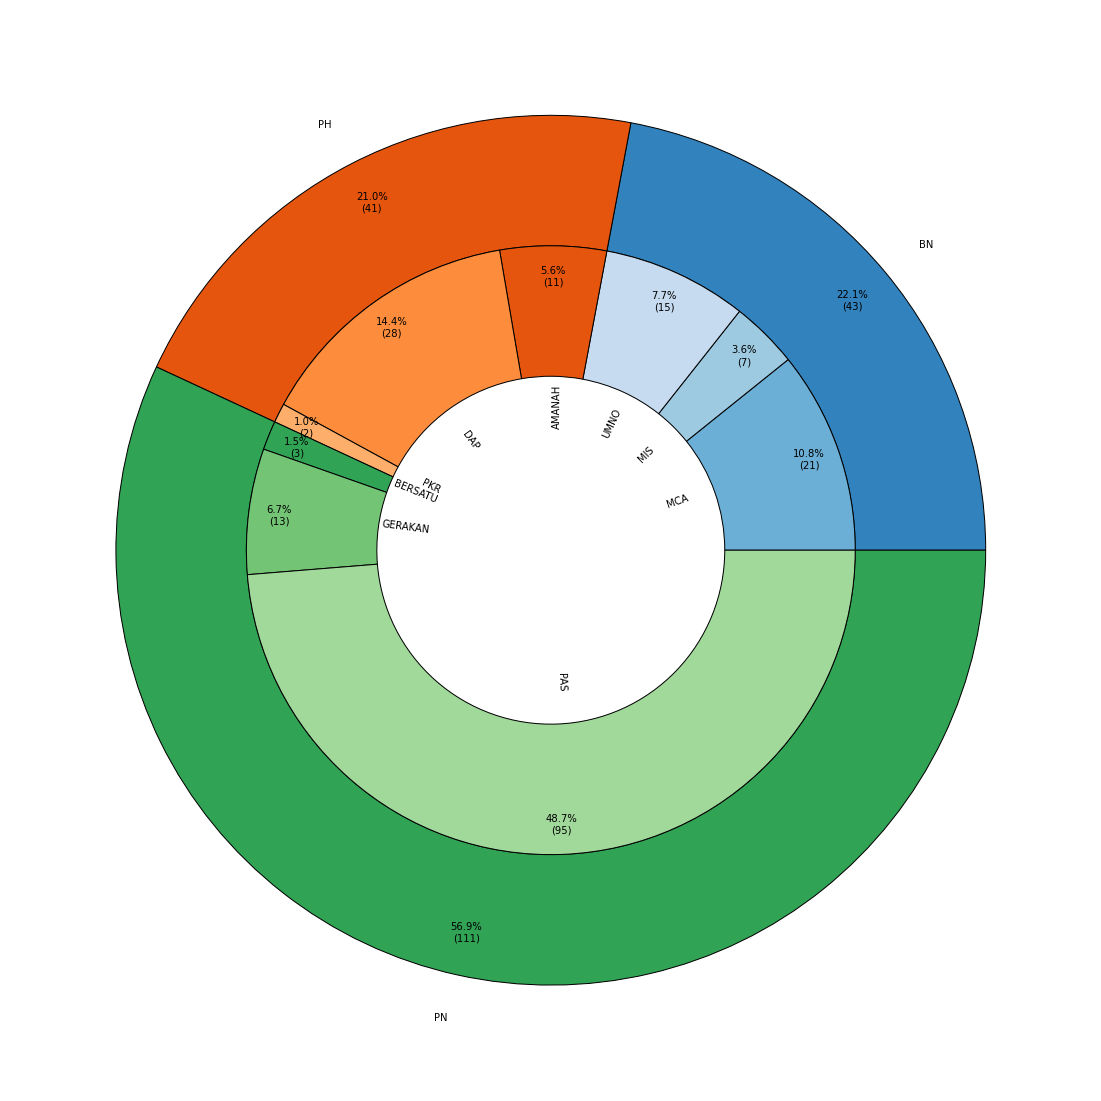

In [270]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(40,20))
size = 0.3

ax.pie(df_party_outer.values.flatten(), radius=1,
       labels=df_party_outer.index,
       autopct = lambda pct: func(pct, df_party_outer),
       pctdistance = 0.9,
       colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='black'))

ax.pie(df_party_inner.values.flatten(), radius=1-size, 
       labels = inner_labels,
       autopct = lambda pct: func(pct, df_party_inner),
       pctdistance = 0.9,
       colors=inner_colors,
       labeldistance = 0.4,
       rotatelabels = True,
       wedgeprops=dict(width=size, edgecolor='black'))

# Save pie chart to django static folder
path = os.getcwd() + r"\django-volt-dashboard\apps\static\assets\pc-party.png"

plt.savefig(path, bbox_inches="tight")

#plt.show()